# Simple Linear Regression

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df=pd.read_csv("height-weight.csv")

In [5]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

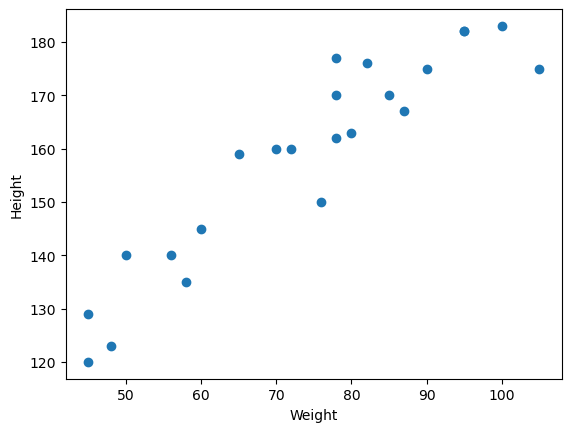

In [8]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel('Height')


In [9]:
# divide dataset into independent and dependent feature

In [51]:
X=df[['Weight']] #Indepemdent feature
y=df['Height'] #Dependant feature

In [52]:
#train test split
from sklearn.model_selection import train_test_split

In [53]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [54]:
X.shape

(23, 1)

In [55]:
X_train.shape

(18, 1)

In [56]:
#Standardisation

In [57]:
from sklearn.preprocessing import StandardScaler

In [58]:
scaler=StandardScaler()

In [59]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

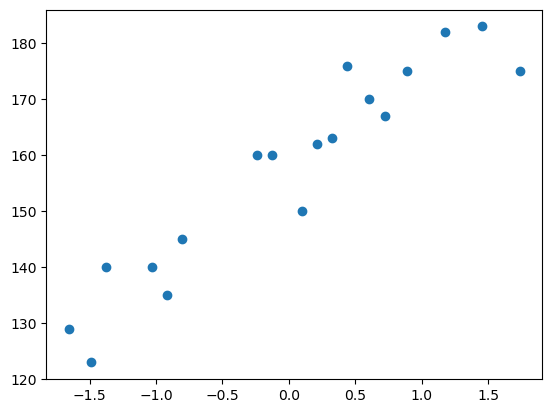

In [60]:
plt.scatter(X_train,y_train)

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
regressor=LinearRegression()

In [63]:
regressor.fit(X_train,y_train)

LinearRegression()

In [64]:
print("Slope of weight is: ",regressor.coef_)

Slope of weight is:  [17.03440872]


In [67]:
print("Intercept of line is: ",regressor.intercept_)

Intercept of line is:  157.5


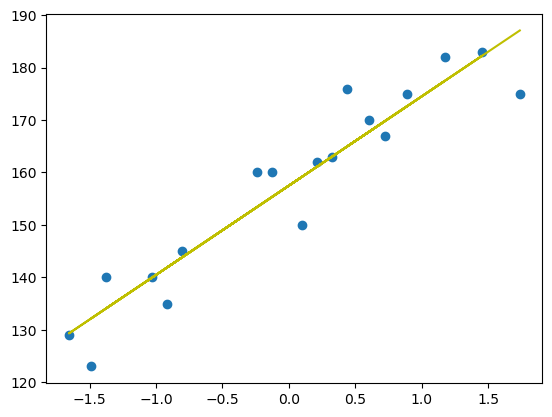

In [73]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regressor.predict(X_train),'y')

In [76]:
y_pred=regressor.predict(X_test)
y_pred,y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

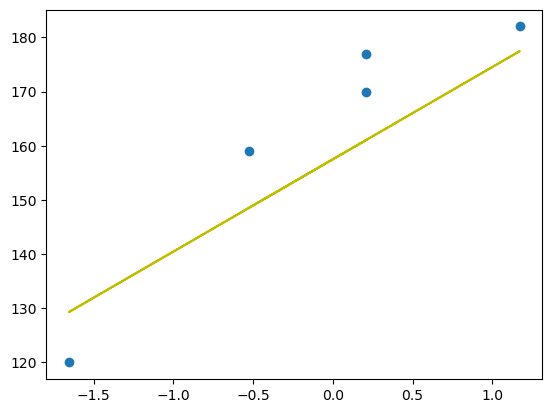

In [77]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regressor.predict(X_test),'y')

### Performance metrics

In [79]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [81]:
mse=mean_squared_error(y_test,y_pred)

In [82]:
mse

109.77592599051664

In [83]:
mae=mean_absolute_error(y_test,y_pred)

In [84]:
mae

9.822657814519232

In [86]:
rmse=np.sqrt(mse)

In [87]:
rmse

10.477400726827081

In [88]:
from sklearn.metrics import r2_score

In [89]:
score=r2_score(y_test,y_pred)

In [90]:
score

0.776986986042344

In [91]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

In [92]:
# new data point weight is 80

In [95]:
scaled_weight=scaler.transform([[80]])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [96]:
scaled_weight

array([[0.32350772]])

In [98]:
regressor.predict([scaled_weight[0]])

array([163.01076266])

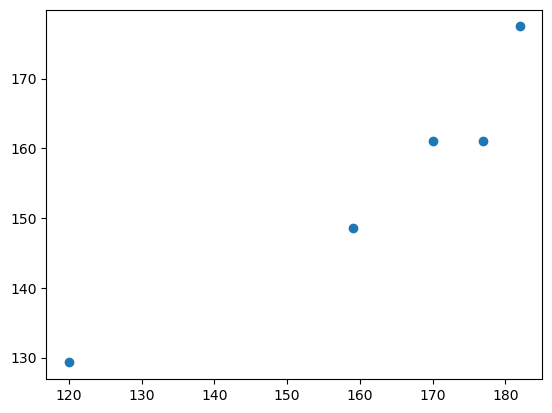

In [103]:
## Assumption
# plot a scatter plot for prediction
plt.scatter(y_test,y_pred)

In [106]:
##Residuals
residuals=y_test-y_pred

In [108]:
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

In [109]:
## plot this residual

In [110]:
import seaborn as sns

/tmp/ipykernel_109/3762910054.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<AxesSubplot: xlabel='Height', ylabel='Density'>

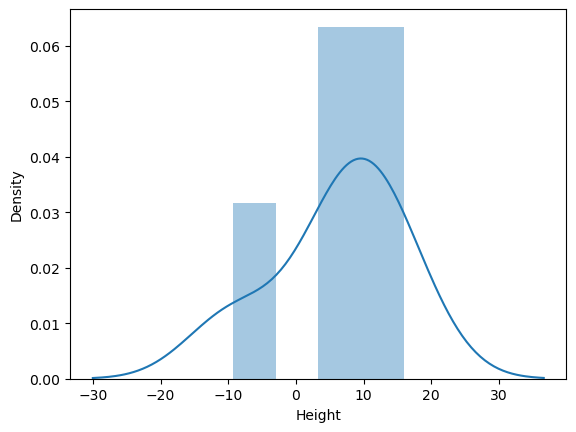

In [111]:
sns.distplot(residuals,kde=True)

In [112]:
## scatter plot with respect to y_pred and residual
## uniform distribution

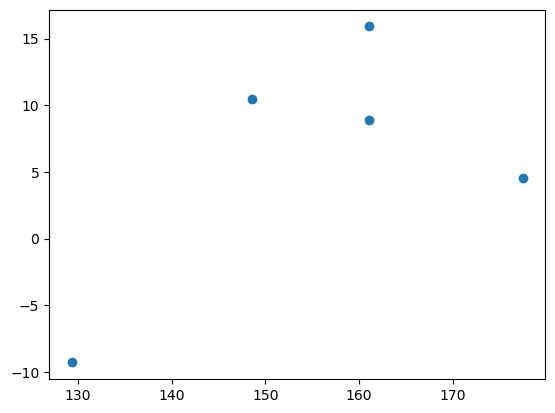

In [113]:
plt.scatter(y_pred,residuals)